In [1]:
#Import the required packages
#Import package pandas for data analysis
import pandas as pd
from pandas.tools import plotting
import seaborn as sns

# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

In [5]:
# Reading from a csv file, into a data frame
dfB = pd.read_csv('smithfieldBikesWeather.csv')
dfB.shape

(6297, 30)

In [7]:
dfS=dfB[["dateTime","Day","hour","stationName","temperature","humidity","windSpeed","clouds","stationBikesAvailable"]]
dfS.head()

,dateTime,Day,hour,stationName,temperature,humidity,windSpeed,clouds,stationBikesAvailable
0,18/02/2019 20:36,Monday,20,SMITHFIELD,7,87,5,75,8
1,18/02/2019 20:38,Monday,20,SMITHFIELD,7,87,5,75,8
2,18/02/2019 20:43,Monday,20,SMITHFIELD,7,87,5,75,12
3,18/02/2019 20:44,Monday,20,SMITHFIELD,7,87,5,75,12
4,19/02/2019 09:11,Tuesday,9,SMITHFIELD,6,75,4,75,0


<Figure size 432x288 with 0 Axes>

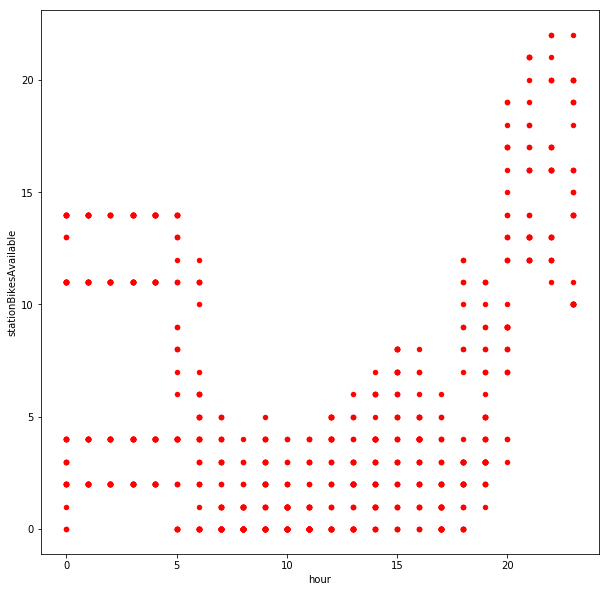

In [10]:
plt.figure()
dfS.loc[dfS['Day']=='Monday'].plot(kind='scatter', x='hour', y='stationBikesAvailable', color='r',figsize=(10, 10))    


In [9]:
dfS.loc[dfS['Day']=='Monday'][["hour","stationBikesAvailable"]].describe()


,hour,stationBikesAvailable
count,909.000000,909.000000
mean,11.082508,5.303630
std,6.736940,5.389887
min,0.000000,0.000000
25%,5.000000,1.000000
50%,11.000000,3.000000
75%,17.000000,9.000000
max,23.000000,22.000000


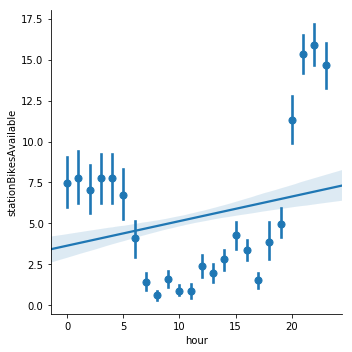

In [12]:
sns.lmplot(x="hour", y="stationBikesAvailable", data=dfS.loc[dfS['Day']=='Monday'], x_estimator=np.mean);

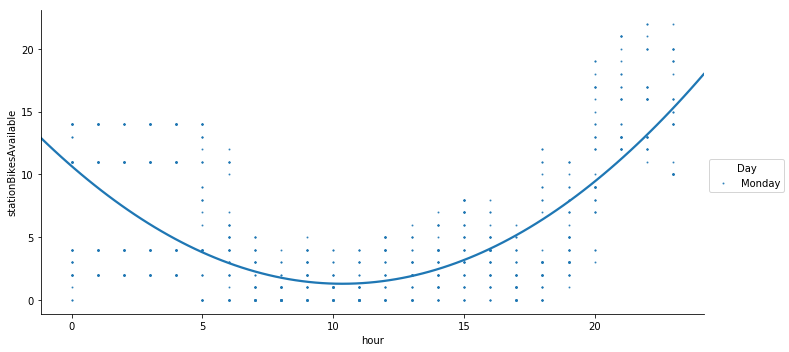

In [42]:
# Fitted Trend line for Mondays.
sns.lmplot(x="hour", y="stationBikesAvailable", data=dfS.loc[dfS['Day']=='Monday'], hue='Day', 
           order=2, ci=None, scatter_kws={"s": 1},size=5, aspect=2);

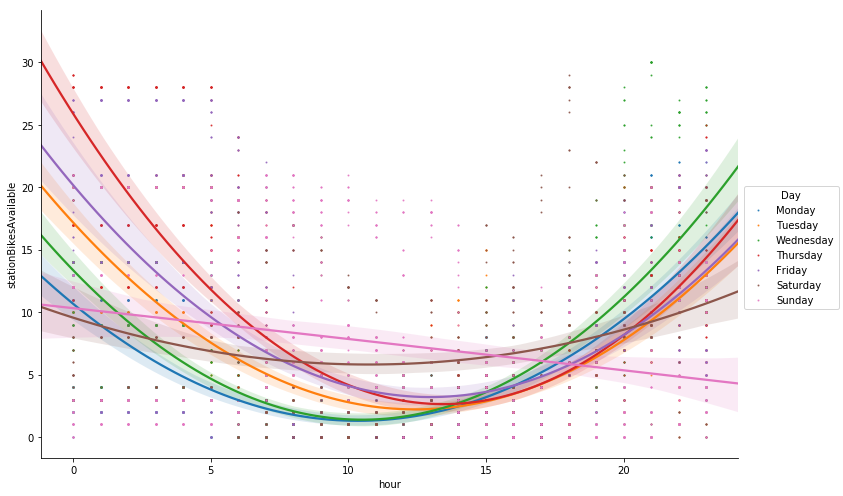

In [49]:
# Fitted Trend line for all days for Smithfield.
plot=sns.lmplot(x="hour", y="stationBikesAvailable", data=dfS, hue='Day', order=2, ci=100, 
           scatter_kws={"s": 1},size=7, aspect=1.5);
plot.savefig('smithfieldDayTimeModel.png')

/Users/ivanwahlrab/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


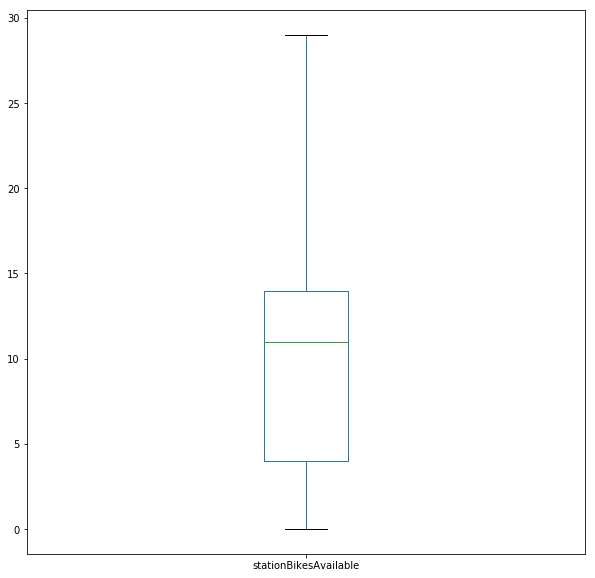

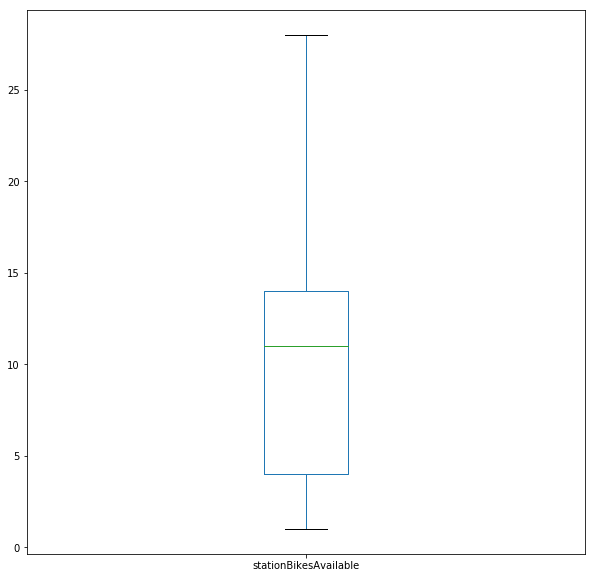

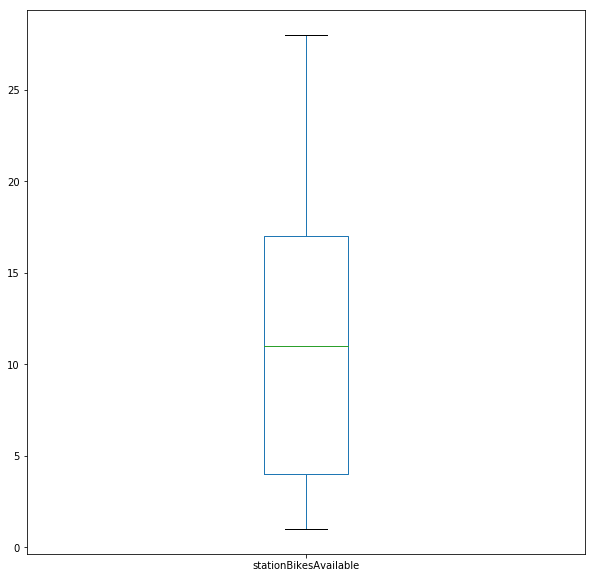

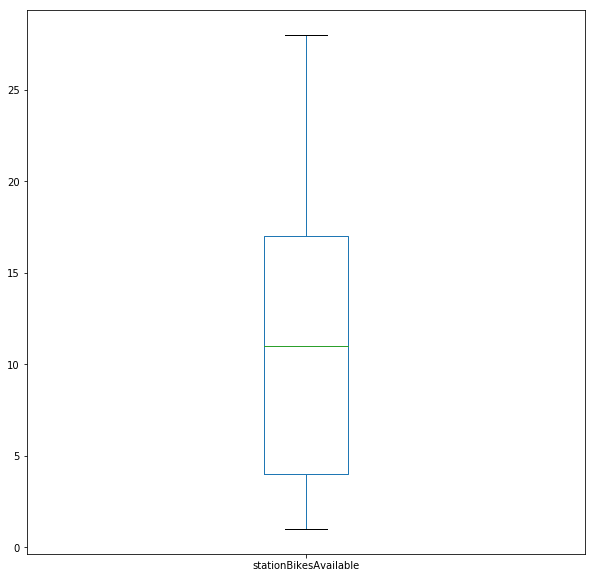

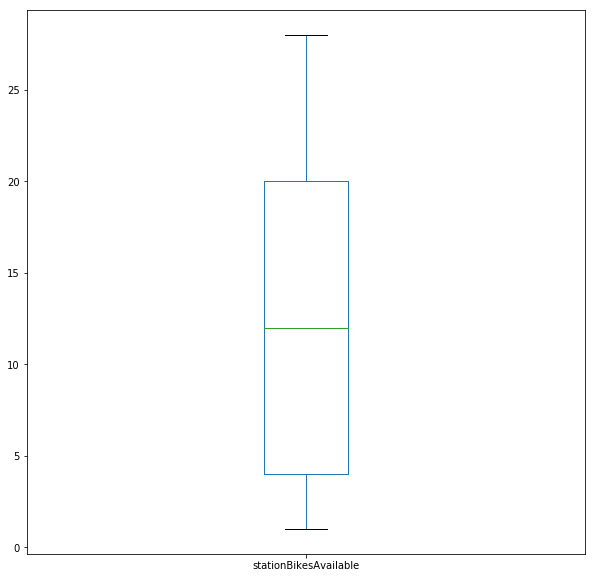

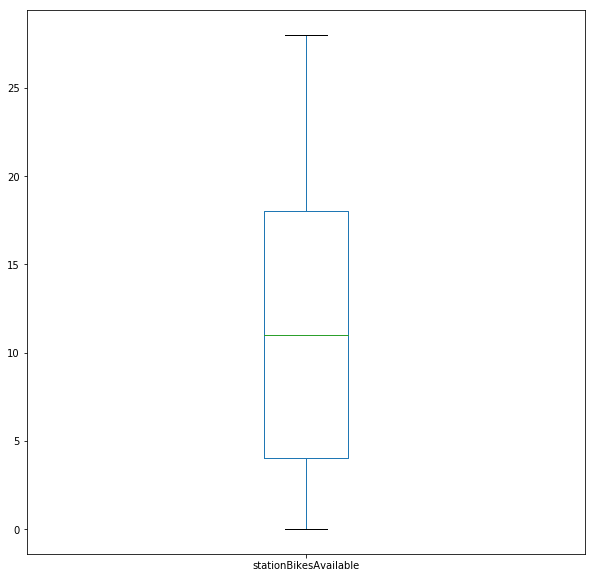

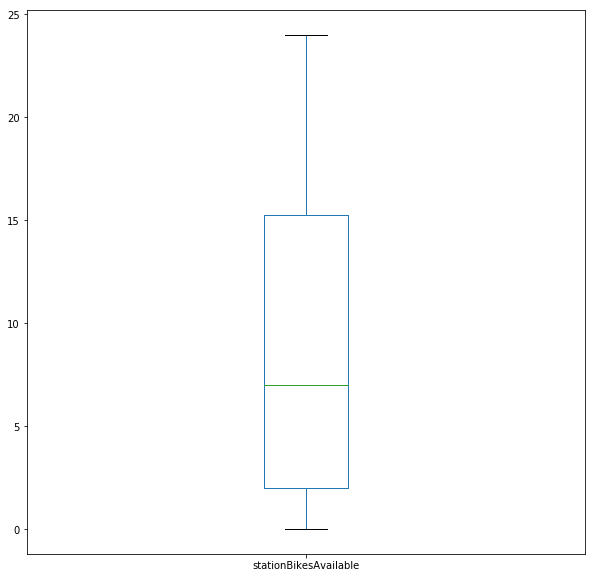

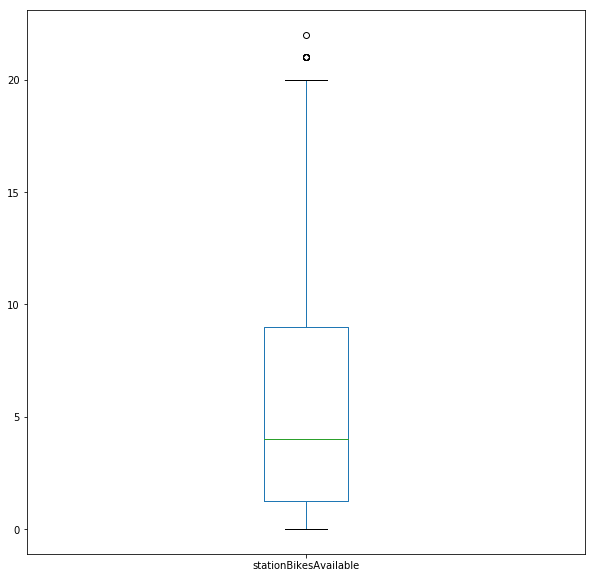

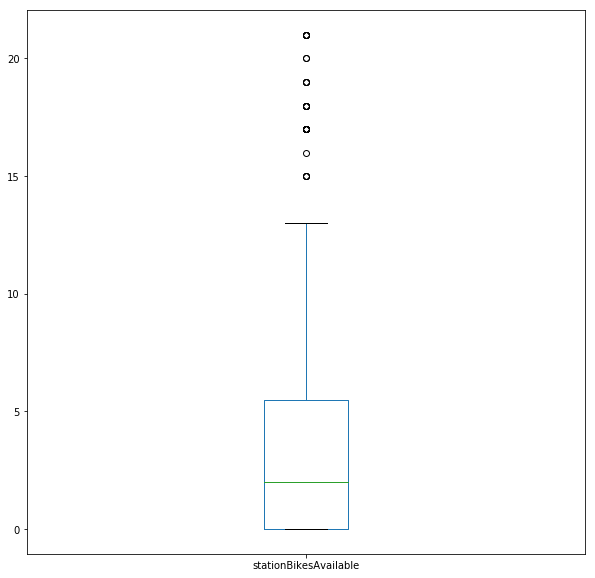

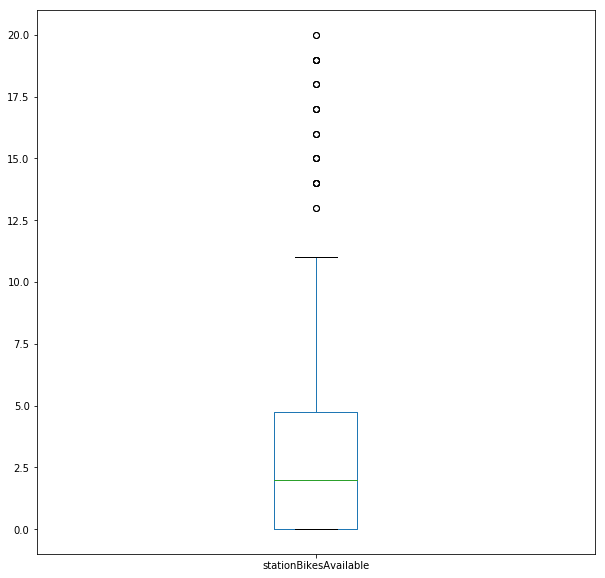

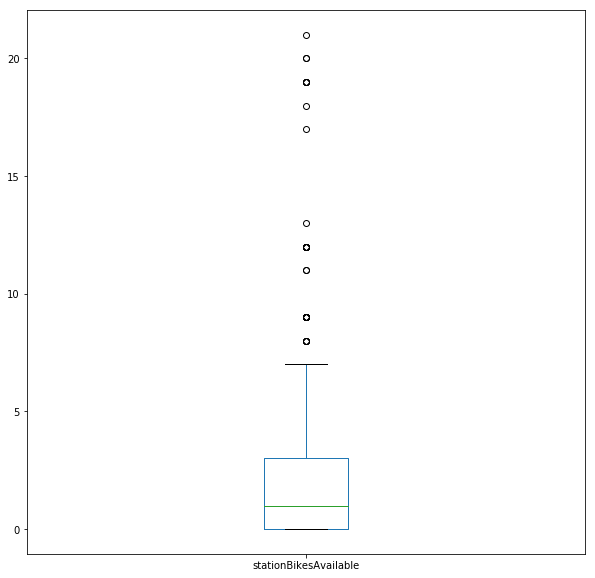

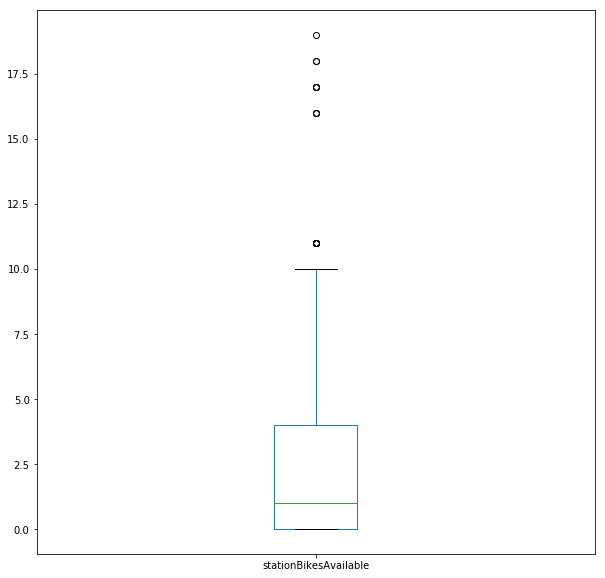

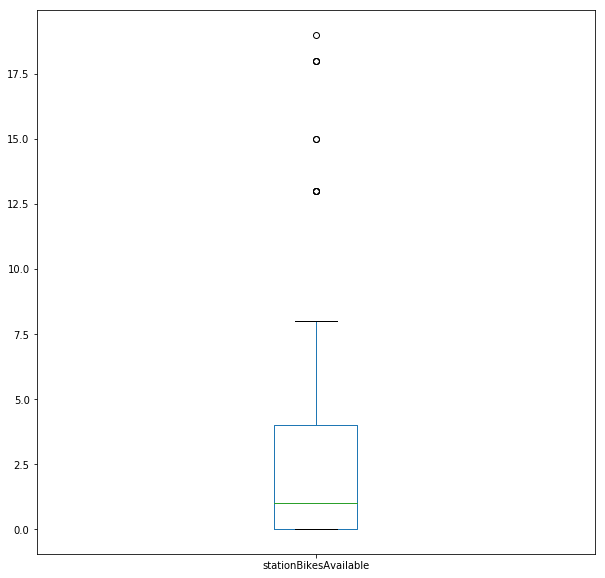

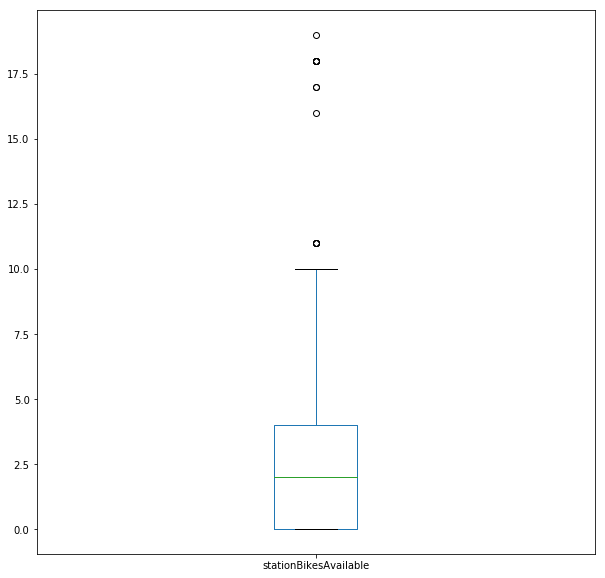

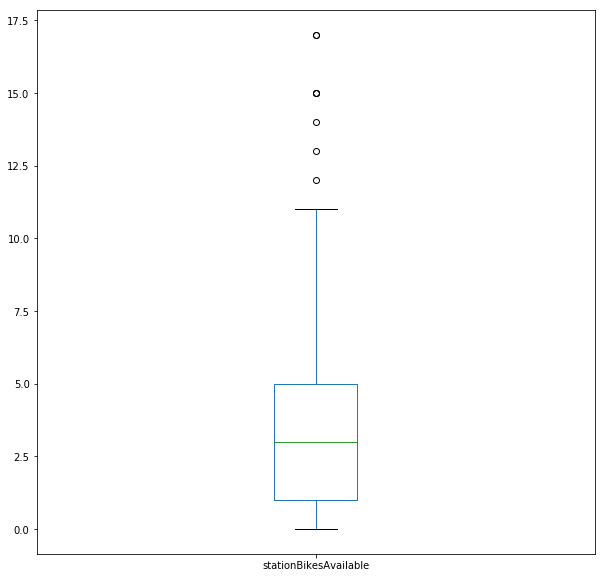

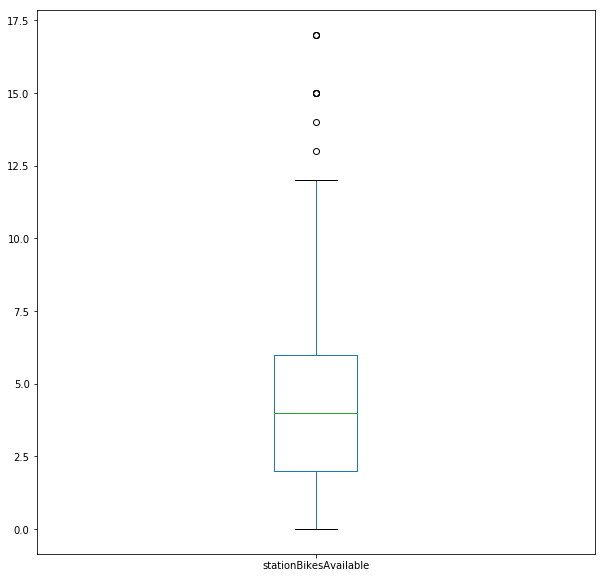

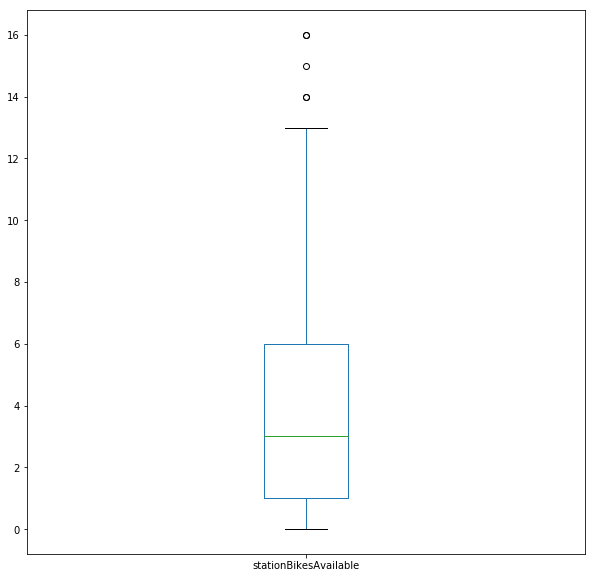

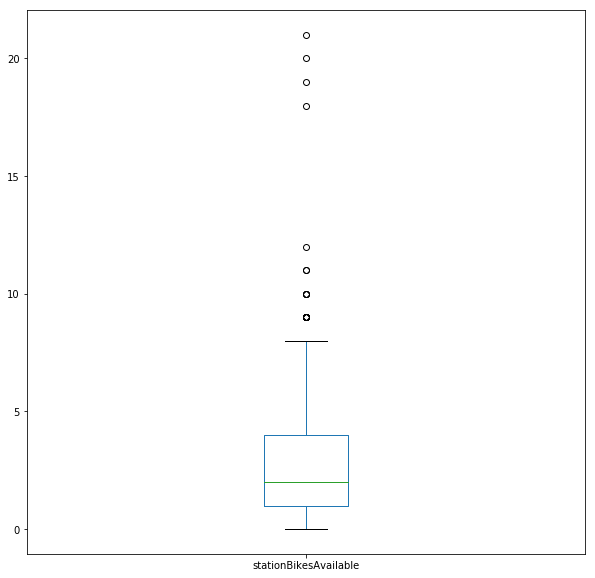

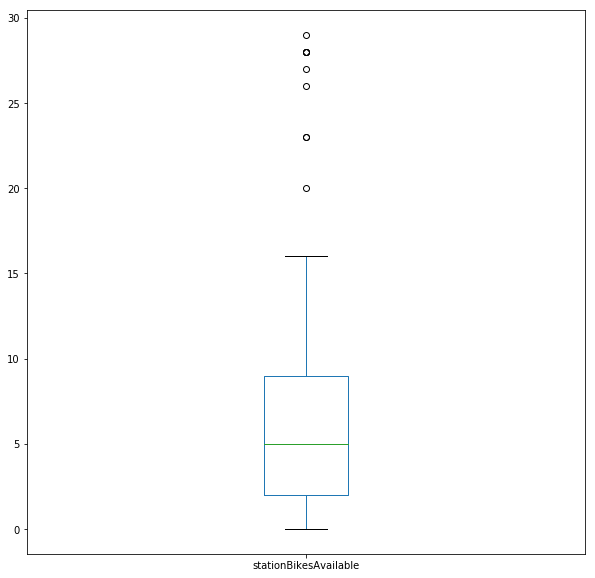

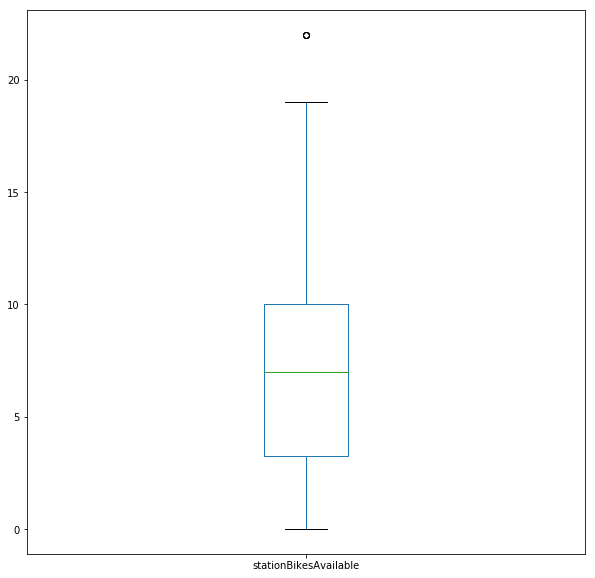

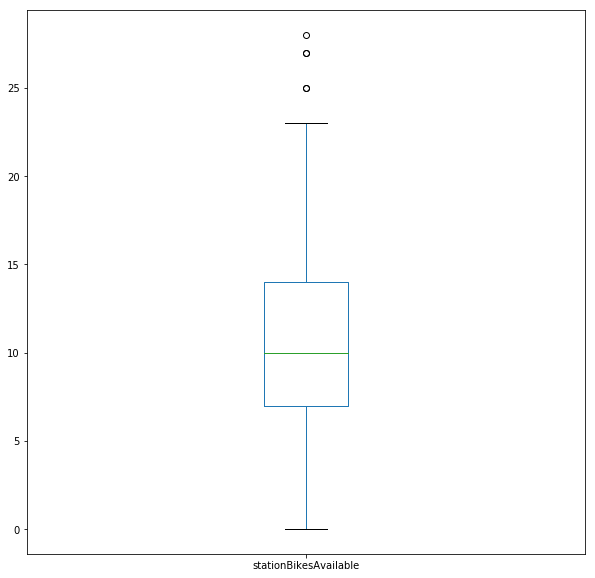

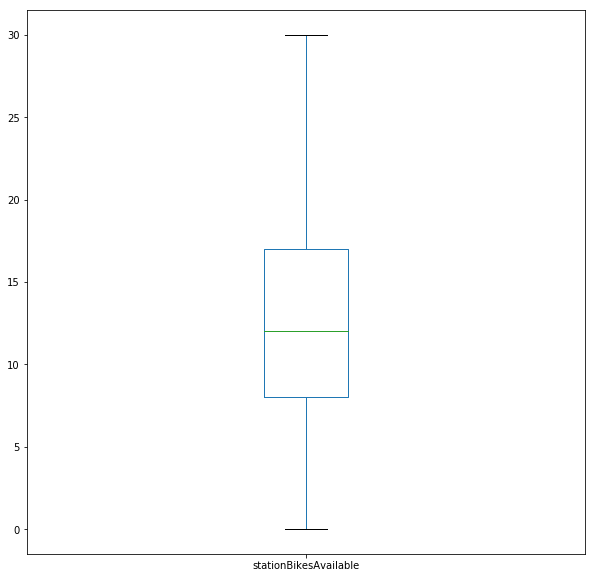

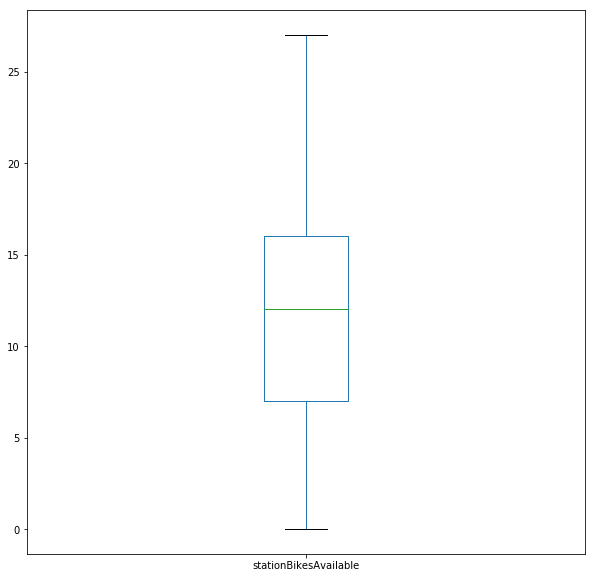

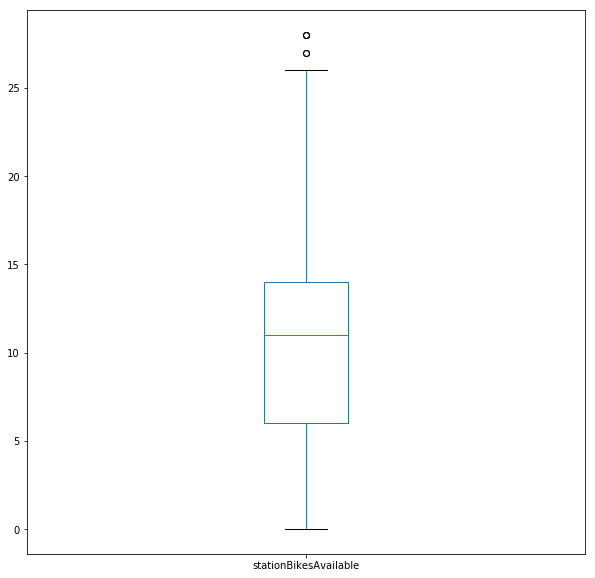

In [19]:
for i in range(0,24):
    fig = plt.figure()
    dfS.loc[dfS['hour']==i]["stationBikesAvailable"].plot(kind='box', figsize=(10, 10))